In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Google Colab Datasets/winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

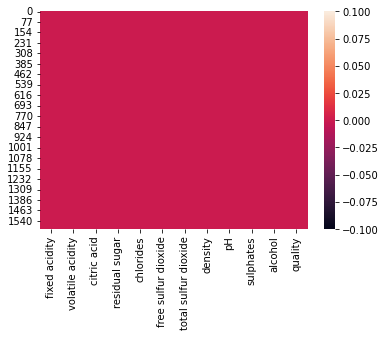

In [ ]:
sns.heatmap(df.isnull())

**Get overall statistics of the dataset**

In [ ]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Correlation Matrix**

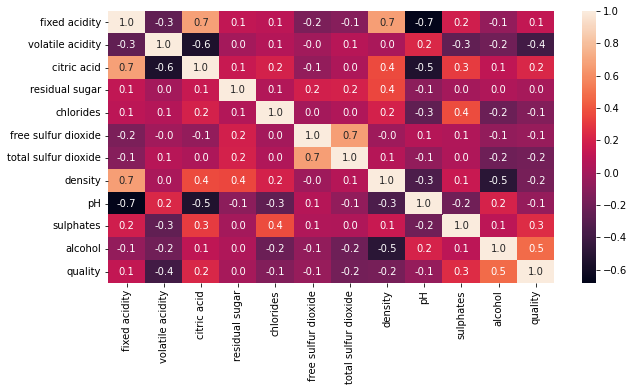

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='0.1f')

**Binarization of Target Variable**

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df['quality'] = [1 if x>=7 else 0 for x in df['quality']]

In [ ]:
df['quality'].unique()

array([0, 1])

**Handling imbalanced dataset**

In [ ]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


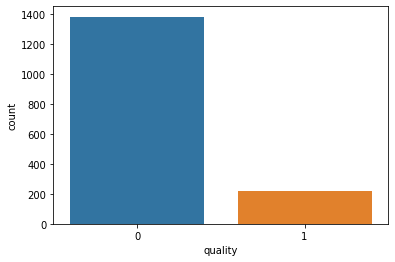

In [ ]:
sns.countplot(df['quality'])

In [ ]:
x= df.drop(['quality'],axis=1)
y= df['quality']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Handling the imbalanced data**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [ ]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [ ]:
x_train

array([[-0.49642649, -0.95656586,  0.26992053, ...,  0.27605778,
        -0.35750227,  1.69775981],
       [ 0.33417609, -1.31159427,  0.16196671, ...,  0.81235627,
         0.95871605, -0.55313887],
       [ 0.70701739,  2.4140555 , -0.34968858, ...,  0.74469017,
        -0.18547221,  0.27432249],
       ...,
       [ 0.31198719,  0.7570621 , -1.64518143, ..., -0.8267827 ,
        -0.43980439, -0.43739616],
       [-0.19590877,  0.96418628, -1.12698429, ..., -0.07520872,
         0.32319215,  0.007428  ],
       [-0.76023762,  0.87541877, -1.33426315, ...,  1.42793924,
        -1.01205179, -1.23807965]])

**APPLYING PCA**

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=0.90) # meaning I want to retain 90% of the information  or it can be PCA(n_components=7/9) meaning how many features I want to retain

In [ ]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
pca.explained_variance_ratio_ # from 11 features it is reduced to 7 features retaining 90% of the information

array([0.28994973, 0.18846425, 0.14236706, 0.1054293 , 0.08591522,
       0.06021351, 0.0462085 ])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9185475722803202

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log= LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8028933092224232

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred)


0.7703180212014135

In [ ]:
recall_score(y_test,y_pred)

0.8320610687022901

In [ ]:
f1_score(y_test,y_pred)

0.8000000000000002

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       291
           1       0.77      0.83      0.80       262

    accuracy                           0.80       553
   macro avg       0.80      0.80      0.80       553
weighted avg       0.81      0.80      0.80       553



**Support Vector classifier**

In [ ]:
from sklearn import svm


In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8661844484629295

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       291
           1       0.83      0.91      0.87       262

    accuracy                           0.87       553
   macro avg       0.87      0.87      0.87       553
weighted avg       0.87      0.87      0.87       553



**KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.8679927667269439

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       291
           1       0.80      0.97      0.87       262

    accuracy                           0.87       553
   macro avg       0.88      0.87      0.87       553
weighted avg       0.89      0.87      0.87       553



**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4 = dt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.8607594936708861

In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       291
           1       0.83      0.89      0.86       262

    accuracy                           0.86       553
   macro avg       0.86      0.86      0.86       553
weighted avg       0.86      0.86      0.86       553



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.9059674502712477

In [ ]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       291
           1       0.88      0.94      0.90       262

    accuracy                           0.91       553
   macro avg       0.91      0.91      0.91       553
weighted avg       0.91      0.91      0.91       553



**Gradient Boosting classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6 = gbc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred6)

0.8698010849909584

In [ ]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       291
           1       0.84      0.89      0.87       262

    accuracy                           0.87       553
   macro avg       0.87      0.87      0.87       553
weighted avg       0.87      0.87      0.87       553



In [ ]:
final_data = pd.DataFrame({'Models': ['LR','SVC','KNN','DT','RFC','GBC'], 'Accuracy' : [accuracy_score(y_test,y_pred)*100,accuracy_score(y_test,y_pred2)*100,accuracy_score(y_test,y_pred3)*100,accuracy_score(y_test,y_pred4)*100,accuracy_score(y_test,y_pred5)*100,accuracy_score(y_test,y_pred6)*100]})

In [ ]:
final_data

,Models,Accuracy
0,LR,80.289331
1,SVC,86.618445
2,KNN,86.799277
3,DT,86.075949
4,RFC,90.596745
5,GBC,86.980108


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


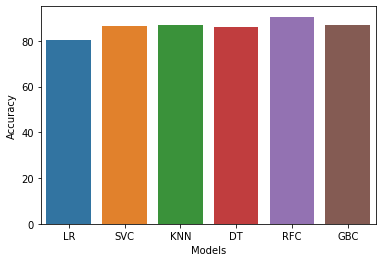

In [ ]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

Use of **joblib** to save our best model